In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
from collections import Counter

In [2]:
#Read the comment data
df_emotion2022 = pd.read_csv(r".\PTT_data\Data preprocessing\2022_comment_job.csv")
df_emotion2022.head(2)

,author,title,year,month,date,time,message_data,message,message_day,message_time,message_ip,type,Break_word,POS_tags
0,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:32,2022/12/22,這是真的我上次去日本玩隔壁車廂就在拍a片我還被找,5/05,10:32,0,推,"是,真的,上,次,去,日本,玩,隔壁,車廂,就,在,拍,a片,還,被,找","是 SHI,真的 D,上 Nes,次 Nf,去 VCL,日本 Nc,玩 VC,隔壁 Nc,車..."
1,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,去拍打雞肉,5/05,10:23:11,0,推,"去,拍打,雞肉","去 D,拍打 VC,雞肉 Na"


In [3]:
df_emotion2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        8136 non-null   object
 1   title         8168 non-null   object
 2   year          8168 non-null   int64 
 3   month         8168 non-null   int64 
 4   date          8168 non-null   int64 
 5   time          8167 non-null   object
 6   message_data  8168 non-null   object
 7   message       8168 non-null   object
 8   message_day   8166 non-null   object
 9   message_time  8167 non-null   object
 10  message_ip    8166 non-null   object
 11  type          8168 non-null   object
 12  Break_word    8168 non-null   object
 13  POS_tags      8168 non-null   object
dtypes: int64(3), object(11)
memory usage: 893.5+ KB


In [4]:
#Convert the segmented word vocabulary into a string format
df_emotion2022['Break_word'] = df_emotion2022['Break_word'].astype(str)
df_emotion2022['Break_word']

0       是,真的,上,次,去,日本,玩,隔壁,車廂,就,在,拍,a片,還,被,找
1                                    去,拍打,雞肉
2                                         嘻嘻
3                                      數位,垃圾
4                       接下來,就,是,市場,出現,海量,礦渣卡
                        ...                 
8163                       學母,豬菜,買,雙頭龍,比較,實際
8164                                  資深,ccr
8165                         歲辣台,嬤歲,醫師娘台女,臉皮
8166                                   歲,女孩兒
8167                                      笑死
Name: Break_word, Length: 8168, dtype: object

In [5]:
list_comment = df_emotion2022['Break_word'].apply(lambda x: x.split(','))
list_comment

0       [是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...
1                                             [去, 拍打, 雞肉]
2                                                    [嘻嘻]
3                                                [數位, 垃圾]
4                            [接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]
                              ...                        
8163                             [學母, 豬菜, 買, 雙頭龍, 比較, 實際]
8164                                            [資深, ccr]
8165                                 [歲辣台, 嬤歲, 醫師娘台女, 臉皮]
8166                                             [歲, 女孩兒]
8167                                                 [笑死]
Name: Break_word, Length: 8168, dtype: object

# Sentiment dictionary_Shaver

In [6]:
# Sentiment analysis function
def Shaver_sentiment(list_sentiment, dict_path):
    # Read the sentiment dictionary
    Shaver = pd.read_csv(dict_path, sep=",", encoding="utf-8")
    Sentiment_dict =  dict((i,a) for i,a in zip(Shaver['詞語'],Shaver['情緒代號']))
    
    # Create an empty list to store the sentiment analysis results of all comments
    Sentiment_list=[]
    for sentience in list_sentiment:
        d = s1 = f = a = s2 = j = 0
        for word in sentience:
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'DW':
                d += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'SW1':
                s1 += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'FW':
                f += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'AW':
                a += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'SW2':
                s2 += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'JW':
                j += 1
                
         # Create a DataFrame to store the sentiment analysis results of a single comment
        Sentiment = {'文本': sentience, '厭惡': d,'悲傷': s1, '恐懼': f, '生氣': a, '驚喜': s2, '開心': j}
        df = pd.DataFrame([Sentiment])
        
        # Add the sentiment analysis results of a single comment to the list
        Sentiment_list.append(df)
        
     # Combine the sentiment analysis results of all comments into a single DataFrame
    Sentiment_data = pd.concat(Sentiment_list)
    return Sentiment_data

In [7]:
# Call the sentiment analysis function and add the results as a new column
dict_path = r"..\..\..\字典\shaver_me.csv"
Sentiment_data = Shaver_sentiment(list_sentiment=list_comment, dict_path=dict_path)

In [8]:
# Check if any sentiment features were extracted during the analysis
Sentiment_data

,文本,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,"[是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...",0,0,0,0,0,0
0,"[去, 拍打, 雞肉]",0,0,0,1,0,0
0,[嘻嘻],0,0,0,0,0,1
0,"[數位, 垃圾]",1,0,0,0,0,0
0,"[接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]",0,0,0,0,0,0
...,...,...,...,...,...,...,...
0,"[學母, 豬菜, 買, 雙頭龍, 比較, 實際]",0,0,0,0,0,0
0,"[資深, ccr]",0,0,0,0,0,0
0,"[歲辣台, 嬤歲, 醫師娘台女, 臉皮]",0,0,0,0,0,0
0,"[歲, 女孩兒]",0,0,0,0,0,0


In [9]:
Sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8168 entries, 0 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   文本      8168 non-null   object
 1   厭惡      8168 non-null   int64 
 2   悲傷      8168 non-null   int64 
 3   恐懼      8168 non-null   int64 
 4   生氣      8168 non-null   int64 
 5   驚喜      8168 non-null   int64 
 6   開心      8168 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 510.5+ KB


In [10]:
# Reset the index of the DataFrame
Sentiment_data.reset_index(inplace=True)
Sentiment_data

,index,文本,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,0,"[是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...",0,0,0,0,0,0
1,0,"[去, 拍打, 雞肉]",0,0,0,1,0,0
2,0,[嘻嘻],0,0,0,0,0,1
3,0,"[數位, 垃圾]",1,0,0,0,0,0
4,0,"[接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8163,0,"[學母, 豬菜, 買, 雙頭龍, 比較, 實際]",0,0,0,0,0,0
8164,0,"[資深, ccr]",0,0,0,0,0,0
8165,0,"[歲辣台, 嬤歲, 醫師娘台女, 臉皮]",0,0,0,0,0,0
8166,0,"[歲, 女孩兒]",0,0,0,0,0,0


In [11]:
# Merge the sentiment analysis results with the original data, placing them at the end
df_inner = df_emotion2022.merge(Sentiment_data, how='inner', left_index=True, right_index=True)
df_inner.head()

,author,title,year,month,date,time,message_data,message,message_day,message_time,...,Break_word,POS_tags,index,文本,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:32,2022/12/22,這是真的我上次去日本玩隔壁車廂就在拍a片我還被找,5/05,10:32,...,"是,真的,上,次,去,日本,玩,隔壁,車廂,就,在,拍,a片,還,被,找","是 SHI,真的 D,上 Nes,次 Nf,去 VCL,日本 Nc,玩 VC,隔壁 Nc,車...",0,"[是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...",0,0,0,0,0,0
1,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,去拍打雞肉,5/05,10:23:11,...,"去,拍打,雞肉","去 D,拍打 VC,雞肉 Na",0,"[去, 拍打, 雞肉]",0,0,0,1,0,0
2,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:44,2022/12/22,嘻嘻,12/22,10:44,...,嘻嘻,嘻嘻 D,0,[嘻嘻],0,0,0,0,0,1
3,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,數位垃圾,12/22,10:23:11,...,"數位,垃圾","數位 A,垃圾 Na",0,"[數位, 垃圾]",1,0,0,0,0,0
4,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,12:10,2022/12/22,接下來就是市場出現海量礦渣卡,12/22,12:10,...,"接下來,就,是,市場,出現,海量,礦渣卡","接下來 D,就 D,是 SHI,市場 Nc,出現 VH,海量 Na,礦渣卡 Na",0,"[接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]",0,0,0,0,0,0


In [12]:
df_inner=df_inner.drop(columns=['index','文本'])

In [13]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        8136 non-null   object
 1   title         8168 non-null   object
 2   year          8168 non-null   int64 
 3   month         8168 non-null   int64 
 4   date          8168 non-null   int64 
 5   time          8167 non-null   object
 6   message_data  8168 non-null   object
 7   message       8168 non-null   object
 8   message_day   8166 non-null   object
 9   message_time  8167 non-null   object
 10  message_ip    8166 non-null   object
 11  type          8168 non-null   object
 12  Break_word    8168 non-null   object
 13  POS_tags      8168 non-null   object
 14  厭惡            8168 non-null   int64 
 15  悲傷            8168 non-null   int64 
 16  恐懼            8168 non-null   int64 
 17  生氣            8168 non-null   int64 
 18  驚喜            8168 non-null   int64 
 19  開心    

In [14]:
# 設定儲存 CSV 檔案的資料夾路徑
save_dir = "./PTT_data/Data preprocessing/"

# 將資料框儲存成 CSV 檔案到指定的資料夾中
filename = "2022emotion_shaver_me_6Class_comment_job.csv" # 檔案名稱
df_inner.to_csv(os.path.join(save_dir, filename), index=False,encoding='utf-8-sig')

## Shaver_Visualization of sentiment statistics

In [15]:
#根據大到小排序
mood=['厭惡','悲傷','恐懼','生氣','驚喜','開心']
mood_sorted = sorted(mood, key=lambda x: Sentiment_data[x][Sentiment_data[x] > 0.0].count(), reverse=True)
Sentiment_data1 = Sentiment_data[mood_sorted][Sentiment_data[mood_sorted] > 0.0].count()
Sentiment_data1

厭惡    635
生氣    483
開心    424
恐懼    269
悲傷    260
驚喜     23
dtype: int64

In [16]:
# 定義情緒顏色字典
emotion_colors = {
    '厭惡': 'chocolate',
    '生氣': 'lightcoral',
    '開心': 'gold',
    '恐懼': 'mediumpurple',
    '悲傷': 'skyblue',
    '驚喜': 'lightgreen'
}
colors = [emotion_colors[m] for m in mood_sorted]

#這段程式是根據上面colors = [emotion_colors[m] for m in mood]來做拆解
# colors = []
# for m in mood:
#     colors.append(emotion_colors[m])
# colors

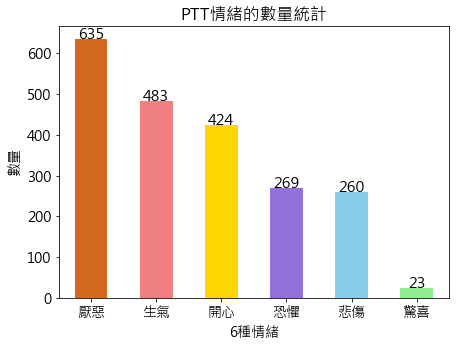

In [17]:
fig = plt.figure(figsize=(7,5))
# Set the font size to 14
plt.rcParams.update({'font.size': 14})
Sentiment_data1.plot(kind='bar',color=colors,rot=0)
# Add numeric labels
for i, v in enumerate(Sentiment_data1.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=15)  

plt.title('PTT情緒的數量統計')
plt.ylabel('數量')
plt.xlabel('6種情緒')
plt.grid(False)

# Set the folder path for saving the images
#存取檔案要當在plt.show()前面，要辦放在後面會存取變空白
save_dir = "./PTT_data/picture_ptt"

# 儲存圖片到指定的資料夾中
filename = "Shavere emotion PTT comment_job.png" # 圖片檔案名稱
plt.savefig(os.path.join(save_dir, filename),dpi=300, bbox_inches='tight')
plt.show()

## Using sentiment dictionary for sentiment word counting

In [18]:
emotion_dict = pd.read_csv(r"..\..\..\字典\shaver_me.csv", encoding='utf-8')
emotion_dict

,詞語,情緒代號,情緒
0,小心,DW,厭惡
1,小心的,DW,厭惡
2,小心謹慎,DW,厭惡
3,小心謹慎的,DW,厭惡
4,一團糟,DW,厭惡
...,...,...,...
6086,驚歎,SW2,驚喜
6087,令人驚奇,SW2,驚喜
6088,令人驚奇的,SW2,驚喜
6089,驚奇,SW2,驚喜


In [19]:
# Define a color dictionary for emotions.
emotion_colors = {
    '開心': 'gold',
    '生氣': 'lightcoral',
    '悲傷': 'skyblue',
    '恐懼': 'mediumpurple',
    '厭惡': 'chocolate',
    '驚喜': 'lightgreen'
}

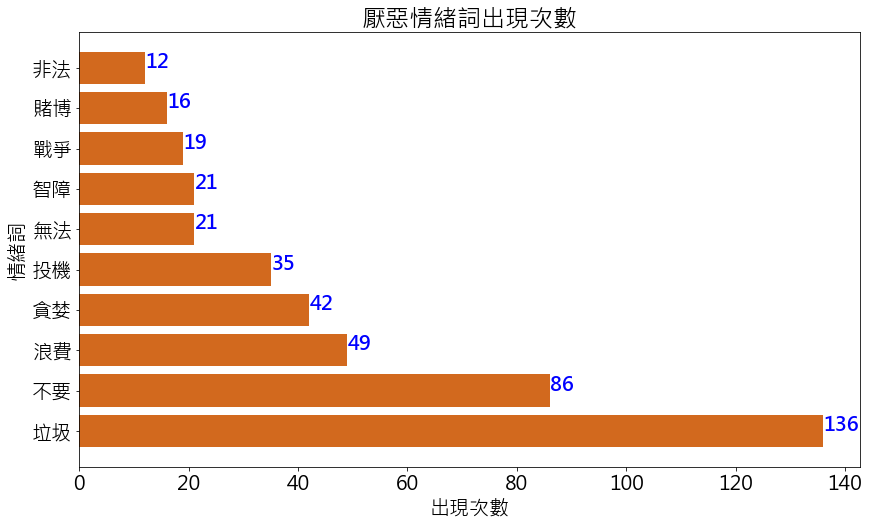

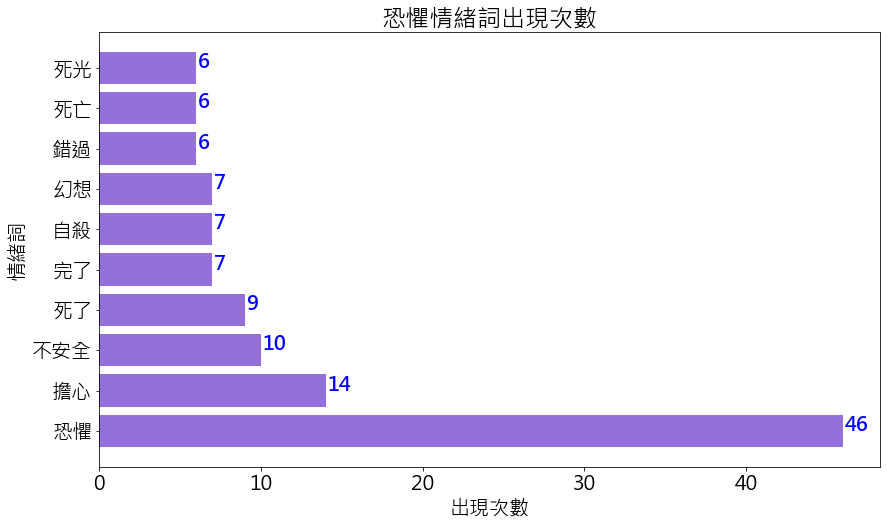

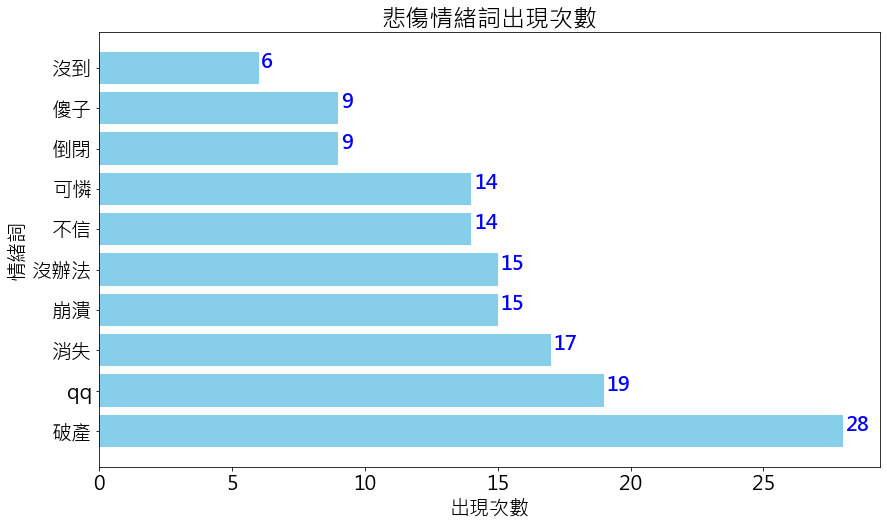

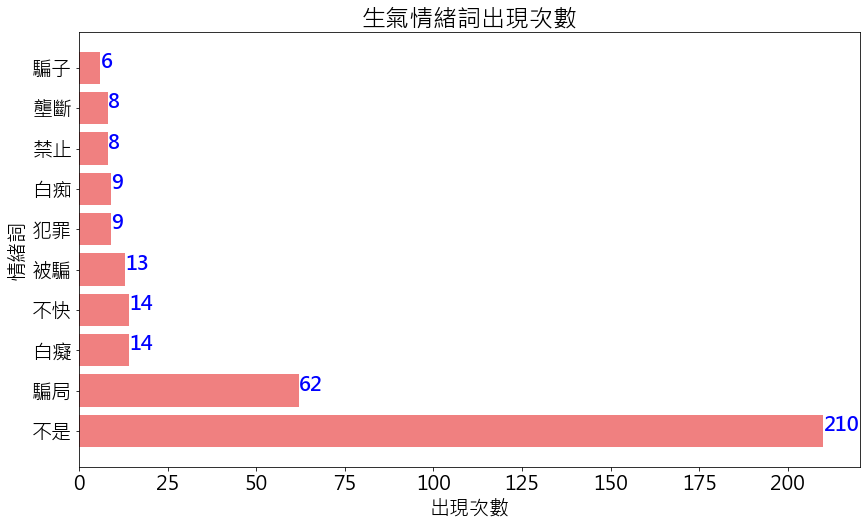

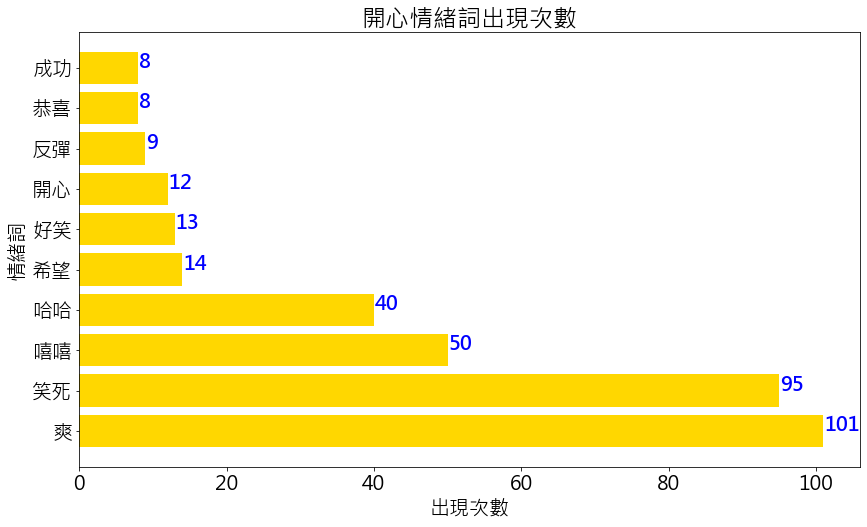

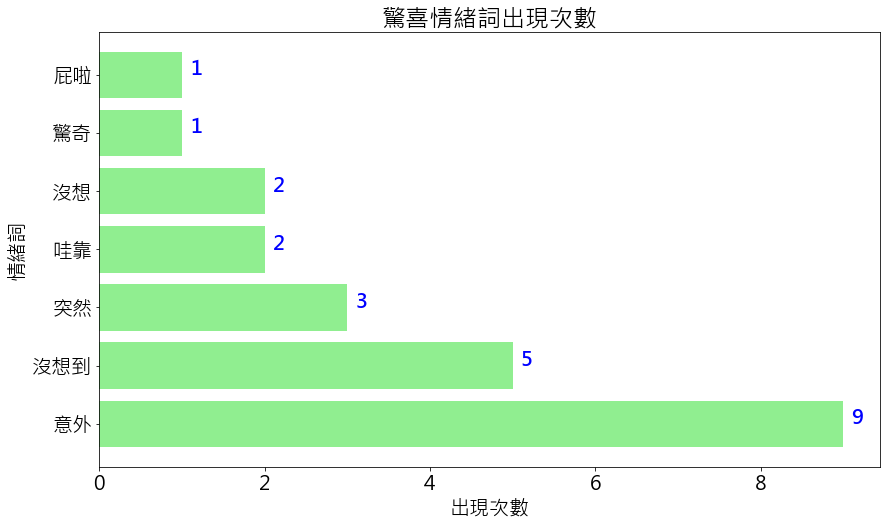

In [20]:
# Grouping by emotion codes
groups = emotion_dict.groupby('情緒')

# Plotting a bar chart of the sentiment word count for each emotion code
for group_id, group_df in groups:
    # Retrieve the list of sentiment words
    emotion_words = list(group_df['詞語'])
    # print(emotion_words)
    
    # Merge the segmented word lists of all comments
    all_words = []
    for comment_words in list_comment:
        all_words.extend(comment_words)
        
    # Calculate the frequency of occurrence of sentiment words
    emotion_word_counts = Counter([word for word in all_words if word in emotion_words])
    # print(emotion_word_counts)
    
   # Convert it to a DataFrame and sort it by the count
    df_emotion_word_counts = pd.DataFrame(list(emotion_word_counts.items()), columns=['情緒詞', '出現次數'])
    df_emotion_word_counts.sort_values(by='出現次數', ascending=False, inplace=True)
    
    #Take only the top 10 sentiment words
    df_emotion_word_counts = df_emotion_word_counts.head(10)  
    
    
    # Plot a bar chart
    plt.figure(figsize=(14, 8))
    plt.rcParams.update({'font.size': 20})
    for i, v in enumerate(df_emotion_word_counts['出現次數']):
        plt.text(v + 0.1, i, str(v), color='b', fontweight='bold')
    
    color = emotion_colors[group_id]

    plt.barh(df_emotion_word_counts['情緒詞'], df_emotion_word_counts['出現次數'], color=color)
    plt.title(str(group_id) + '情緒詞出現次數')
    plt.xlabel('出現次數')
    plt.ylabel('情緒詞')
    plt.savefig(f'./PTT_data/picture_ptt/{group_id}_emotion_word_counts_job.png',dpi=300, bbox_inches='tight')
    plt.show()